# Q2

In [ ]:
import nltk

In [ ]:
nltk.download('reuters')
from nltk.corpus import reuters
!unzip /root/nltk_data/corpora/reuters.zip -d /root/nltk_data/corpora

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
Archive:  /root/nltk_data/corpora/reuters.zip
replace /root/nltk_data/corpora/reuters/cats.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /root/nltk_data/corpora/reuters/README? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import pandas as pd
# create counter to summarize
categories = []
file_count = []

# count each tag's number of documents
for i in reuters.categories():
    """print("$ There are {} documents included in topic \"{}\""
          .format(len(reuters.fileids(i)), i))"""
    file_count.append(len(reuters.fileids(i)))
    categories.append(i)

# create a dataframe out of the counts
df = pd.DataFrame(
    {'categories': categories, "file_count": file_count}) \
    .sort_values('file_count', ascending=False)
print(df.head())

   categories  file_count
21       earn        3964
0         acq        2369
46   money-fx         717
26      grain         582
17      crude         578


In [ ]:
#crude data
doc_list = reuters.fileids(categories=["crude"])
print(doc_list[:100])

['test/14829', 'test/15063', 'test/15200', 'test/15230', 'test/15238', 'test/15244', 'test/15322', 'test/15339', 'test/15344', 'test/15351', 'test/15520', 'test/15939', 'test/15964', 'test/16005', 'test/16007', 'test/16040', 'test/16077', 'test/16366', 'test/16429', 'test/16438', 'test/16593', 'test/16607', 'test/16636', 'test/16649', 'test/16651', 'test/16658', 'test/16710', 'test/16723', 'test/16739', 'test/16762', 'test/17054', 'test/17478', 'test/17516', 'test/17519', 'test/17584', 'test/17618', 'test/17658', 'test/17669', 'test/17750', 'test/17757', 'test/17771', 'test/17780', 'test/17813', 'test/17816', 'test/17875', 'test/17886', 'test/17888', 'test/17892', 'test/17913', 'test/17929', 'test/17963', 'test/18066', 'test/18085', 'test/18108', 'test/18146', 'test/18186', 'test/18213', 'test/18234', 'test/18311', 'test/18325', 'test/18329', 'test/18332', 'test/18340', 'test/18493', 'test/18521', 'test/18523', 'test/18621', 'test/18651', 'test/18655', 'test/18678', 'test/18680', 'test

In [ ]:
def get_corpus_text(doc):
    '''
    return raw text of reuters corpus
    '''
    return [" ".join(reuters.words(fid)) for fid in doc.fileids()] 

In [ ]:
import numpy as np
doc_list = np.array(reuters.fileids(categories=["crude"]))
train_doc = doc_list[['training' in x for x in doc_list]]
test_doc = doc_list[['test' in x for x in doc_list]]

In [ ]:
test_corpus = [" ".join([t for t in reuters.words(test_doc[t])]) for t in range(len(test_doc))]
train_corpus = [" ".join([t for t in reuters.words(train_doc[t])]) for t in range(len(train_doc))]
print(train_corpus[:100])
actual_train = train_corpus[:100]

['CANADA OIL EXPORTS RISE 20 PCT IN 1986 Canadian oil exports rose 20 pct in 1986 over the previous year to 33 . 96 mln cubic meters , while oil imports soared 25 . 2 pct to 20 . 58 mln cubic meters , Statistics Canada said . Production , meanwhile , was unchanged from the previous year at 91 . 09 mln cubic feet . Natural gas exports plunged 19 . 4 pct to 21 . 09 billion cubic meters , while Canadian sales slipped 4 . 1 pct to 48 . 09 billion cubic meters . The federal agency said that in December oil production fell 4 . 0 pct to 7 . 73 mln cubic meters , while exports rose 5 . 2 pct to 2 . 84 mln cubic meters and imports rose 12 . 3 pct to 2 . 1 mln cubic meters . Natural gas exports fell 16 . 3 pct in the month 2 . 51 billion cubic meters and Canadian sales eased 10 . 2 pct to 5 . 25 billion cubic meters .', 'BP & lt ; BP > DOES NOT PLAN TO HIKE STANDARD & lt ; SRD > BID British Petroleum Co Plc does not intend to raise the price of its planned 70 dlr per share offer for the publicly

In [ ]:
import re
import numpy as np

def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })

    return unique_word_dict    

def text_preprocessing(
    text:list,
    punctuations = r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
    stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will']
    )->list:
    """
    A method to preproces text
    """
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, "")

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list 
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x!='']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text

# Functions to find the most similar word 
def euclidean(vec1:np.array, vec2:np.array) -> float:
    """
    A function to calculate the euclidean distance between two vectors
    """
    return np.sqrt(np.sum((vec1 - vec2)**2))

def find_similar(word:str, embedding_dict:dict, top_n=10)->list:
    """
    A method to find the most similar word based on the learnt embeddings
    """
    dist_dict = {}
    word_vector = embedding_dict.get(word, [])
    if len(word_vector) > 0:
        for key, value in embedding_dict.items():
            if key!=word:
                dist = euclidean(word_vector, value)
                dist_dict.update({
                    key: dist
                })

        return sorted(dist_dict.items(), key=lambda x: x[1])[0:top_n]       

In [ ]:
#code which is copied from given source cannot work with the tensorflow 2.4.1 so we should install older version
%pip install tensorflow==2.0.0
%pip install keras==2.3.1

ERROR: Operation cancelled by user


In [ ]:
import itertools
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm

# Drawing the embeddings
import matplotlib.pyplot as plt

# Deep learning: 
from keras.models import Input, Model
from keras.layers import Dense

from scipy import sparse

# print(train_doc)
# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in actual_train:

    # Cleaning the text
    text = text_preprocessing(text)

    # Appending to the all text list
    all_text += text 
    # print(text)

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                # print([word] + [text[(i + 1 + w)]])
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])


Using TensorFlow backend.


In [ ]:
print(all_text)

['canada', 'oil', 'exports', 'rise', 'pct', 'canadian', 'oil', 'exports', 'rose', 'pct', 'over', 'previous', 'year', 'to', 'mln', 'cubic', 'meters', 'while', 'oil', 'imports', 'soared', 'pct', 'to', 'mln', 'cubic', 'meters', 'statistics', 'canada', 'said', 'production', 'meanwhile', 'was', 'unchanged', 'from', 'previous', 'year', 'at', 'mln', 'cubic', 'feet', 'natural', 'gas', 'exports', 'plunged', 'pct', 'to', 'billion', 'cubic', 'meters', 'while', 'canadian', 'sales', 'slipped', 'pct', 'to', 'billion', 'cubic', 'meters', 'federal', 'agency', 'said', 'that', 'december', 'oil', 'production', 'fell', 'pct', 'to', 'mln', 'cubic', 'meters', 'while', 'exports', 'rose', 'pct', 'to', 'mln', 'cubic', 'meters', 'imports', 'rose', 'pct', 'to', 'mln', 'cubic', 'meters', 'natural', 'gas', 'exports', 'fell', 'pct', 'month', 'billion', 'cubic', 'meters', 'canadian', 'sales', 'eased', 'pct', 'to', 'billion', 'cubic', 'meters', 'bp', 'lt', 'bp', 'does', 'not', 'plan', 'to', 'hike', 'standard', 'lt', 

In [ ]:
print(word_lists)

[['canada', 'oil'], ['canada', 'exports'], ['oil', 'exports'], ['oil', 'canada'], ['oil', 'rise'], ['exports', 'rise'], ['exports', 'oil'], ['exports', 'pct'], ['exports', 'canada'], ['rise', 'pct'], ['rise', 'exports'], ['rise', 'canadian'], ['rise', 'oil'], ['pct', 'canadian'], ['pct', 'rise'], ['pct', 'oil'], ['pct', 'exports'], ['canadian', 'oil'], ['canadian', 'pct'], ['canadian', 'exports'], ['canadian', 'rise'], ['oil', 'exports'], ['oil', 'canadian'], ['oil', 'rose'], ['oil', 'pct'], ['exports', 'rose'], ['exports', 'oil'], ['exports', 'pct'], ['exports', 'canadian'], ['rose', 'pct'], ['rose', 'exports'], ['rose', 'over'], ['rose', 'oil'], ['pct', 'over'], ['pct', 'rose'], ['pct', 'previous'], ['pct', 'exports'], ['over', 'previous'], ['over', 'pct'], ['over', 'year'], ['over', 'rose'], ['previous', 'year'], ['previous', 'over'], ['previous', 'to'], ['previous', 'pct'], ['year', 'to'], ['year', 'previous'], ['year', 'mln'], ['year', 'over'], ['to', 'mln'], ['to', 'year'], ['to'

In [ ]:

unique_word_dict = create_unique_word_dict(all_text)

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words 
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into a sparse format because the vast majority of the data are 0s
X = sparse.csr_matrix(X)
Y = sparse.csr_matrix(Y)

73140it [00:02, 26054.34it/s]


In [ ]:

# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

# Optimizing the network weights
model.fit(
    x=X, 
    y=Y, 
    batch_size=256,
    epochs=1000
    )


Epoch 1/1000
73140/73140 [==============================] - 8s 113us/step - loss: 7.8348
Epoch 2/1000
73140/73140 [==============================] - 8s 111us/step - loss: 7.1950
Epoch 3/1000
73140/73140 [==============================] - 8s 111us/step - loss: 6.7616
Epoch 4/1000
73140/73140 [==============================] - 8s 111us/step - loss: 6.6738
Epoch 5/1000
73140/73140 [==============================] - 8s 113us/step - loss: 6.6563
Epoch 6/1000
73140/73140 [==============================] - 8s 113us/step - loss: 6.6480
Epoch 7/1000
73140/73140 [==============================] - 8s 114us/step - loss: 6.6428
Epoch 8/1000
73140/73140 [==============================] - 8s 113us/step - loss: 6.6391
Epoch 9/1000
73140/73140 [==============================] - 8s 115us/step - loss: 6.6363
Epoch 10/1000
73140/73140 [==============================] - 8s 112us/step - loss: 6.6339
Epoch 11/1000
73140/73140 [==============================] - 8s 113us/step - loss: 6.6320
Epoch 12/1000
73140

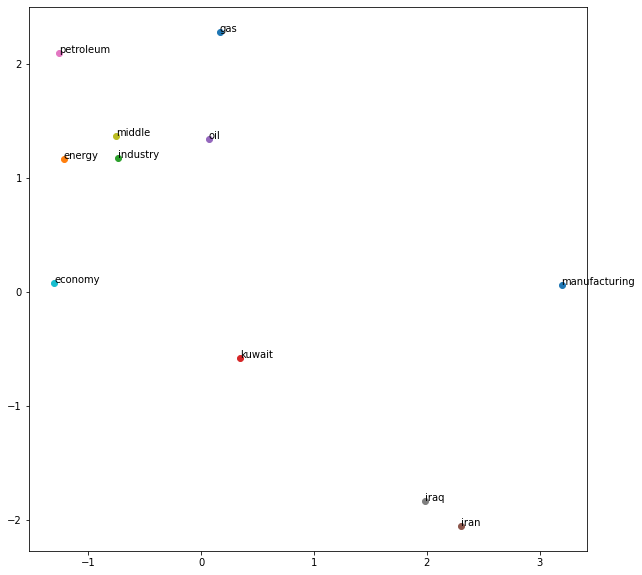

In [ ]:

question_words = [ 'gas', 'energy', 'industry', 'kuwait', 'oil', 'iran', 'petroleum', 'iraq',
 'middle', 'nuclear', 'economy', 'industries', 'manufacturing', 'employees',
 '‫‪emirates‬‬', '‫‪exploitation‬‬', '‫‪exploration‬‬', '‫‪resources‬‬'
]

# The input layer 
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

# Ploting the embeddings
plt.figure(figsize=(10, 10))
for word in question_words:
    coord = embedding_dict.get(word)
    if coord is None or coord.all() == None:
      continue
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))       


# Q3

In [ ]:
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, y_train = shuffle(x_train, y_train)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

#it's dummy i tougth it will make some changes
y_train_without_categorical = y_train.copy()

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# we should run in cpu in order to get proper label
# print(np.where((y_train_without_categorical == 4)))


(array([    5,    14,    37, ..., 59976, 59980, 59998]),)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(
        pool_size=(2, 2)
    ),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(
        pool_size=(2, 2)
    ),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(
        pool_size=(2, 2)
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
def plot_helper(history):
  with plt.style.context('ggplot'): #ggplot is good for visualization
    fig, ax = plt.subplots(1, 2, figsize=(10, 8))

    ax[0].plot(history.history['val_loss'], label='val_loss')
    ax[0].plot(history.history['loss'], label='loss')
    ax[0].legend()

    ax[1].plot(history.history['val_accuracy'], label='val_acc')
    ax[1].plot(history.history['accuracy'], label='acc')
    ax[1].legend()

def plot_row(images, axis):
  for idx, image in enumerate(images):
    axis[idx].imshow(tf.squeeze((image)))

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# model.build(input_shape)
# model.summary()
history = model.fit(x_train, y_train,
    batch_size=64, epochs=15, validation_split=0.2
)

Epoch 1/15
750/750 [==============================] - 72s 95ms/step - loss: 0.1863 - accuracy: 0.9424 - val_loss: 0.0619 - val_accuracy: 0.9810
Epoch 2/15
750/750 [==============================] - 72s 96ms/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0506 - val_accuracy: 0.9843
Epoch 3/15
750/750 [==============================] - 72s 96ms/step - loss: 0.0337 - accuracy: 0.9893 - val_loss: 0.0425 - val_accuracy: 0.9873
Epoch 4/15
750/750 [==============================] - 71s 94ms/step - loss: 0.0253 - accuracy: 0.9914 - val_loss: 0.0431 - val_accuracy: 0.9879
Epoch 5/15
750/750 [==============================] - 72s 96ms/step - loss: 0.0216 - accuracy: 0.9929 - val_loss: 0.0437 - val_accuracy: 0.9880
Epoch 6/15
750/750 [==============================] - 71s 95ms/step - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.0805 - val_accuracy: 0.9799
Epoch 7/15
750/750 [==============================] - 76s 101ms/step - loss: 0.0147 - accuracy: 0.9949 - val_loss: 0.0511 - val_accuracy

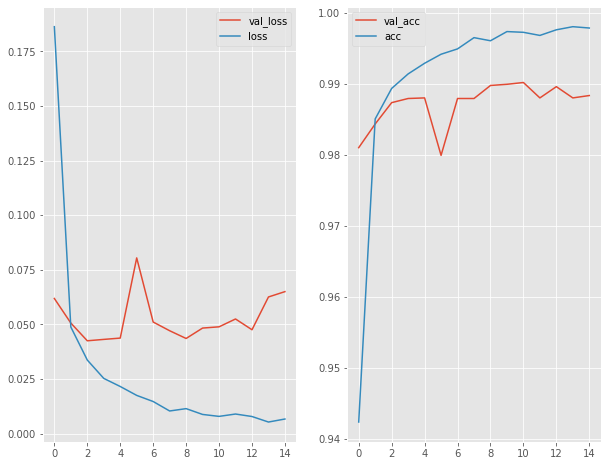

In [ ]:
plot_helper(history)

In [ ]:
import cv2
#https://towardsdatascience.com/understand-your-algorithm-with-grad-cam-d3b62fce353
def generate_heatmap(model, layer_name, img_array):
  gradModel = tf.keras.Model(
  inputs=[model.inputs],
  outputs=[model.get_layer(layer_name).output,
  model.output])
  with tf.GradientTape() as tape:
    # cast the image tensor to a float-32 data type, pass the
    # forward propagate the image through the gradient model, and grab the loss
    # associated with the specific class index
    inputs = tf.cast(img_array, tf.float32)
    (convOutputs, predictions) = gradModel(inputs)
    loss = predictions[:, 0]
  # use automatic differentiation to compute the gradients
  grads = tape.gradient(loss, convOutputs)
  # compute the guided gradients
  castConvOutputs = tf.cast(convOutputs > 0, "float32")
  castGrads = tf.cast(grads > 0, "float32")
  guidedGrads = castConvOutputs * castGrads * grads
  # the convolution and guided gradients have a batch dimension
  # (which we don't need) so let's grab the volume itself and
  # discard the batch
  convOutputs = convOutputs[0]
  guidedGrads = guidedGrads[0]
  # compute the average of the gradient values, and using them
  # as weights, compute the ponderation of the filters with
  # respect to the weights
  weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
  cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
  # grab the spatial dimensions of the input image and resize
  # the output class activation map to match the input image
  # dimensions
  (w, h) = (img_array.shape[2], img_array.shape[1])
  heatmap = cv2.resize(cam.numpy(), (w, h))
  # normalize the heatmap such that all values lie in the range
  # [0, 1], scale the resulting values to the range [0, 255],
  # and then convert to an unsigned 8-bit integer
  numer = heatmap - np.min(heatmap)
  denom = (heatmap.max() - heatmap.min()) + 1e-20
  heatmap = numer / denom

  return heatmap

In [ ]:
#https://github.com/tabayashi0117/Score-CAM/blob/master/gradcamutils.py
def sigmoid(x, a, b, c):
    return c / (1 + np.exp(-a * (x-b)))
    
def superimpose(img_bgr, cam, emphasize=False):

    heatmap = cv2.resize(cam, (img_bgr.shape[1], img_bgr.shape[0]))
    if emphasize:
        heatmap = sigmoid(heatmap, 50, 0.5, 1)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    hif = .8
    superimposed_img = heatmap * hif + img_bgr
    superimposed_img = np.minimum(superimposed_img, 255.0).astype(np.uint8)  # scale 0 to 255  
    superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    
    return superimposed_img_rgb

[   22    48    50 ... 59975 59990 59992]
[    8    27    28 ... 59978 59982 59984]
[    6    13    15 ... 59892 59935 59941]
[   10    29    35 ... 59937 59946 59953]
[    5    14    37 ... 59976 59980 59998]
[    0     3    16 ... 59989 59997 59999]
[   11    19    21 ... 59979 59993 59994]
[    7    12    23 ... 59964 59988 59995]
[   17    20    24 ... 59987 59991 59996]
[    1     2     4 ... 59951 59971 59985]


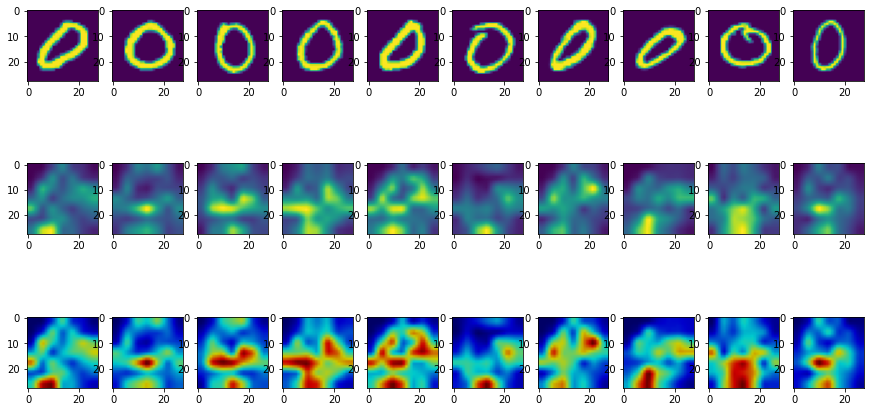

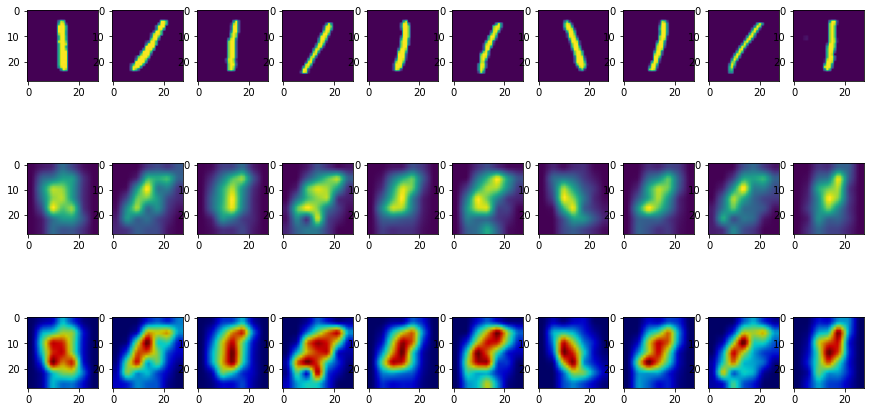

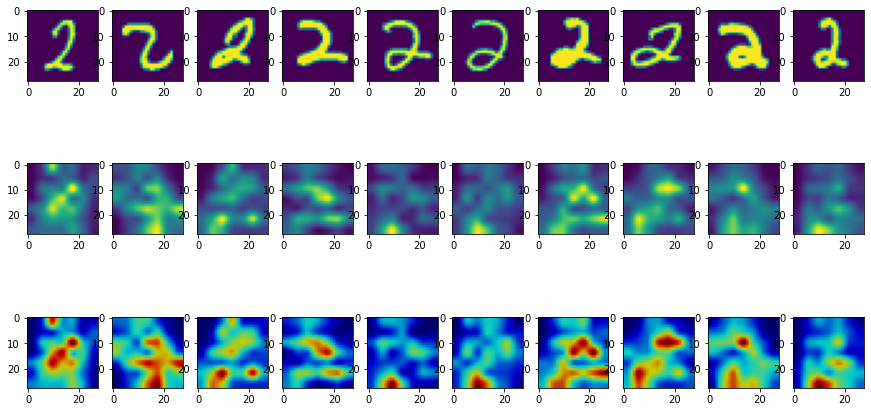

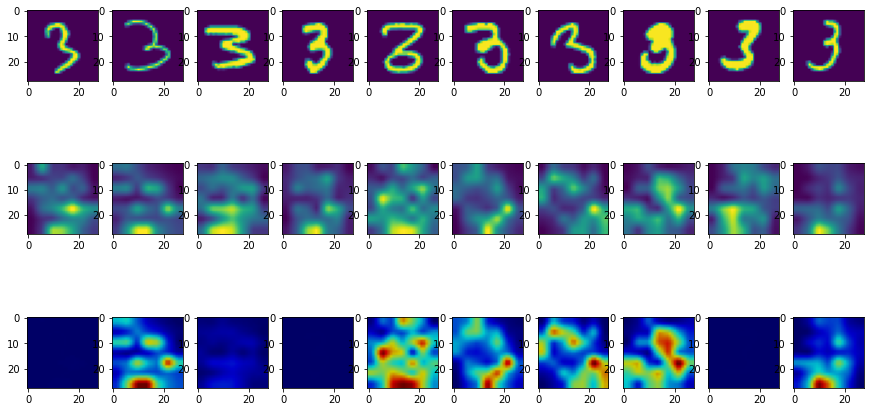

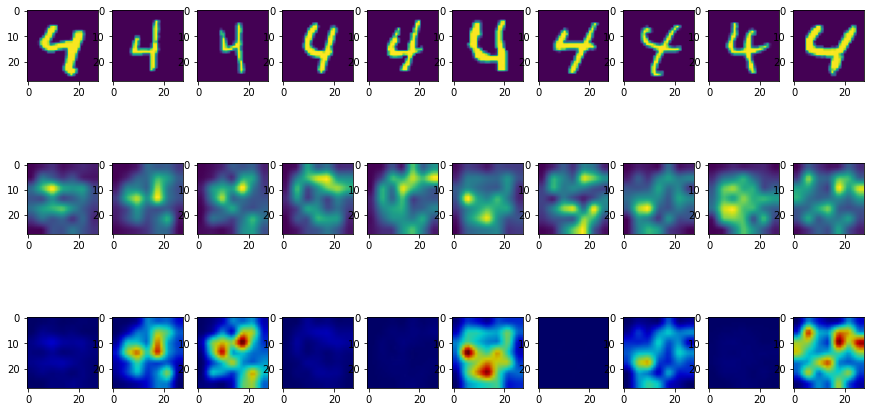

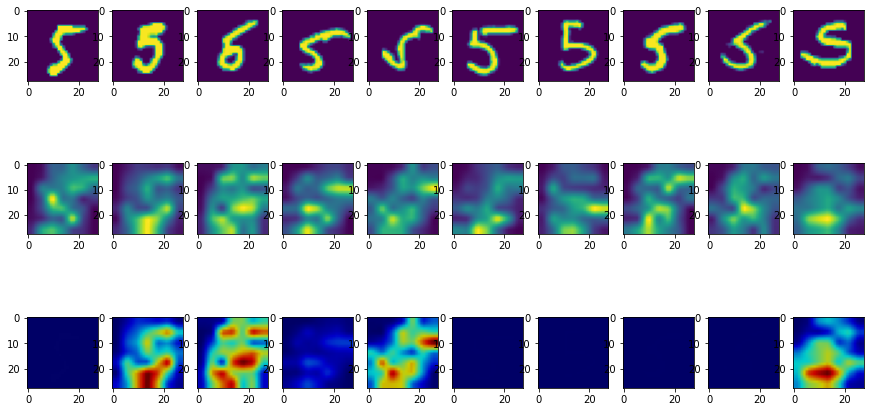

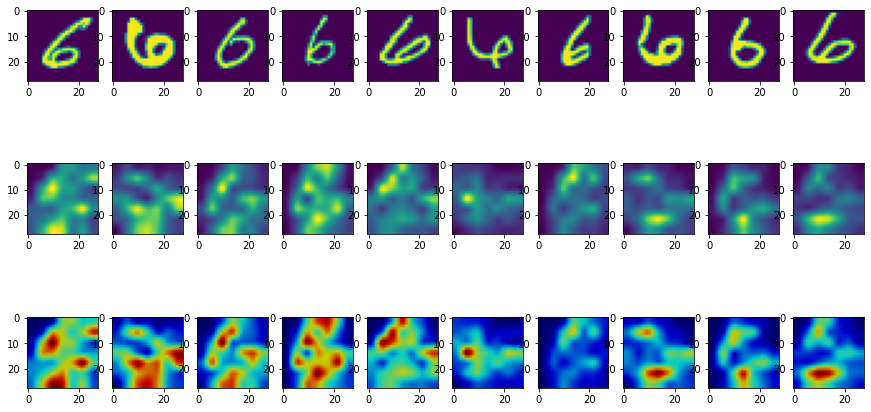

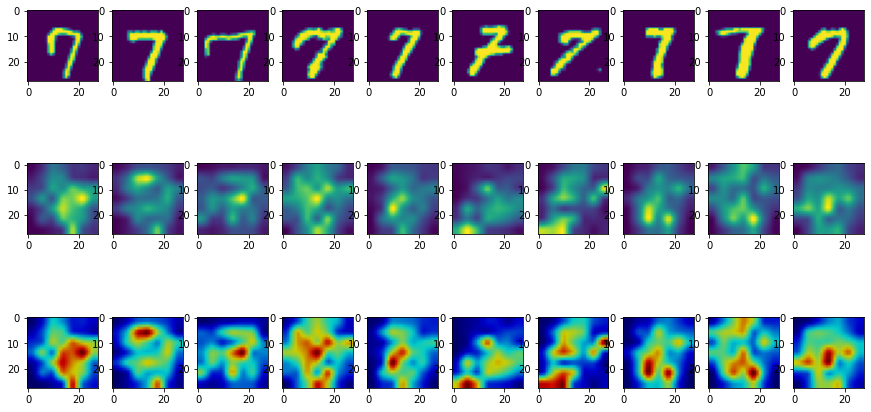

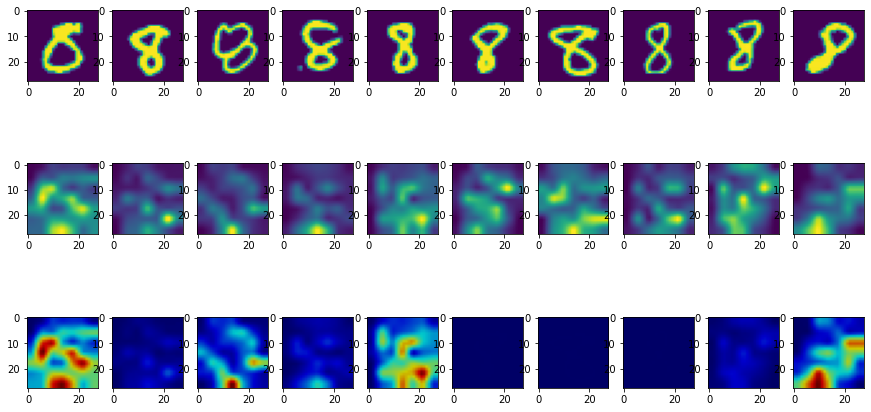

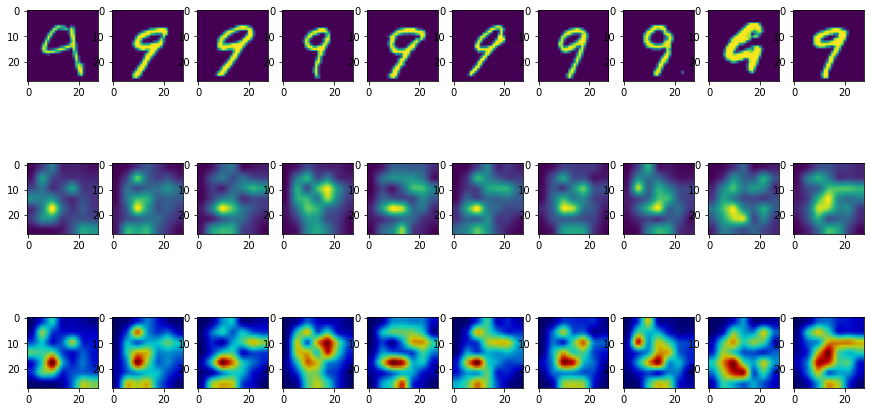

In [ ]:

images = {}
images_with_heatmap = {}
mixure = {}


# model.summary()
# layer_names=[layer.name for layer in model.layers]
# print(layer_names)
# print(y_train)

last_conv_layer_name = "conv2d_2"
for i in range(10):

  #find all x_tran which is equal to i
  #https://stackoverflow.com/questions/4588628/find-indices-of-elements-equal-to-zero-in-a-numpy-array
  #https://stackoverflow.com/questions/51202181/how-do-i-select-only-a-specific-digit-from-the-mnist-dataset-provided-by-keras
  
  all_i = np.where(y_train_without_categorical == i)[0]
  print(all_i)
  all_i = all_i[:10]
  all_image = x_train[all_i]

  images[i] = []
  images_with_heatmap[i] = []
  mixure[i] = []

  for image in all_image:
    images[i].append(image)
    map = generate_heatmap(model, last_conv_layer_name, np.expand_dims(image, axis=0))
    images_with_heatmap[i].append(map)
    mixure[i].append(
        superimpose(
            image,
            map
        )
    )


#plot
for i in range(10):
  fig, axs = plt.subplots(3, 10, figsize=(15, 8))
  plot_row(images[i], axs[0])
  plot_row(images_with_heatmap[i], axs[1])
  plot_row(mixure[i], axs[2])